In [1]:
import os
%pwd  # this tell us which path we are currently working , so based on the below output path we are working under the research file
os.chdir("C:\datascience End to End Projects\steel-plant-Load-Prediction-")  #  but i would like to work with main ProjectML_with_MLFlow file , so for getting i step back in path inorder to enter the main project file i used this command os.chdir("../")
%pwd

'C:\\datascience End to End Projects\\steel-plant-Load-Prediction-'

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


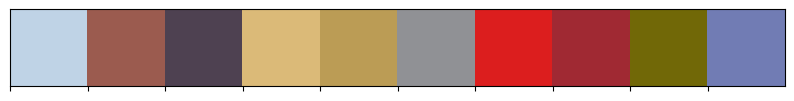

In [4]:
#Drop the index column
df.reset_index(drop=True, inplace=True) 
df.info()

In [5]:
#Default theme
sns.set_theme(palette='tab10',
              font='Comic Sans MS',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')
plt.rcParams["axes.grid"] = False

In [6]:
df=pd.read_csv("C:\\Users\\mahen\\Downloads\\Steel_industry_data.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [8]:
unique_categories = {}
for column in df.select_dtypes(include='object').columns:
    unique_categories[column] = df[column].unique()

print("Unique categories in object datatype columns:")
print(unique_categories)

Unique categories in object datatype columns:
{'date': array(['01/01/2018 00:15', '01/01/2018 00:30', '01/01/2018 00:45', ...,
       '31/12/2018 23:30', '31/12/2018 23:45', '31/12/2018 00:00'],
      dtype=object), 'WeekStatus': array(['Weekday', 'Weekend'], dtype=object), 'Day_of_week': array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object), 'Load_Type': array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)}


In [9]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df['date_year'] = df['date'].dt.year
df['date_month_no'] = df['date'].dt.month
df['date_day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute

# Convert datetime objects to UNIX timestamps (integers)
#df['date'] = df['date'].apply(lambda x: int(x.timestamp()))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [11]:
df.describe()

date     Usage_kWh  \
count                35040  35040.000000   
mean   2018-07-02 11:52:30     27.386892   
min    2018-01-01 00:00:00      0.000000   
25%    2018-04-02 05:56:15      3.200000   
50%    2018-07-02 11:52:30      4.570000   
75%    2018-10-01 17:48:45     51.237500   
max    2018-12-31 23:45:00    157.180000   
std                    NaN     33.444380   

       Lagging_Current_Reactive.Power_kVarh  \
count                          35040.000000   
mean                              13.035384   
min                                0.000000   
25%                                2.300000   
50%                                5.000000   
75%                               22.640000   
max                               96.910000   
std                               16.306000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   
std                                7.424463      0.016151   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   
std                       18.921322                     30.456535   

                NSM  date_year  date_month_no      date_day          hour  \
count  35040.000000    35040.0   35040.000000  35040.000000  35040.000000   
mean   42750.000000     2018.0       6.526027     15.720548     11.500000   
min        0.000000     2018.0       1.000000      1.000000      0.000000   
25%    21375.000000     2018.0       4.000000      8.000000      5.750000   
50%    42750.000000     2018.0       7.000000     16.000000     11.500000   
75%    64125.000000     2018.0      10.000000     23.000000     17.250000   
max    85500.000000     2018.0      12.000000     31.000000     23.000000   
std    24940.534317        0.0       3.447901      8.796373      6.922285   

                min  
count  35040.000000  
mean      22.500000  
min        0.000000  
25%       11.250000  
50%       22.500000  
75%       33.750000  
max       45.000000  
std       16.770749

In [12]:
df.head(5)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0 2018-01-01 00:15:00       3.17                                  2.95   
1 2018-01-01 00:30:00       4.00                                  4.46   
2 2018-01-01 00:45:00       3.24                                  3.28   
3 2018-01-01 01:00:00       3.31                                  3.56   
4 2018-01-01 01:15:00       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  date_year  date_month_no  date_day  \
0    Weekday      Monday  Light_Load       2018              1         1   
1    Weekday      Monday  Light_Load       2018              1         1   
2    Weekday      Monday  Light_Load       2018              1         1   
3    Weekday      Monday  Light_Load       2018              1         1   
4    Weekday      Monday  Light_Load       2018              1         1   

   hour  min  
0     0   15  
1     0   30  
2     0   45  
3     1    0  
4     1   15

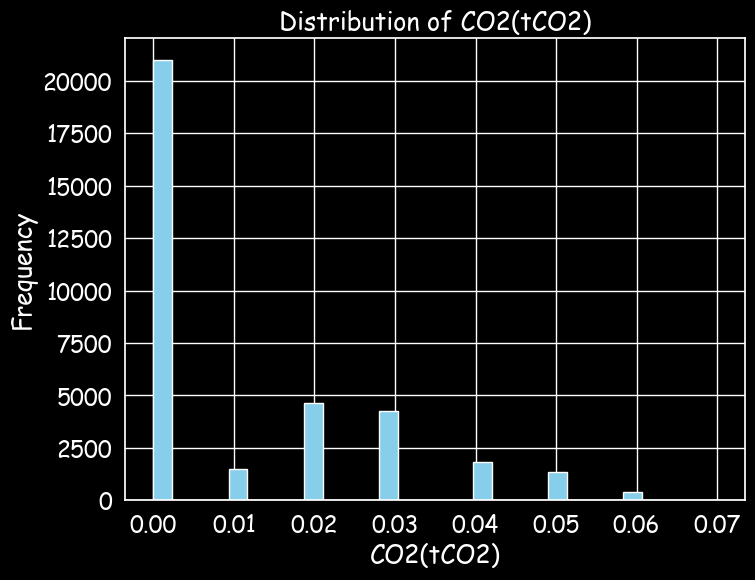

Number of unique values of CO2(tCO2): 8
Counts of each unique value of CO2(tCO2):
CO2(tCO2)
0.00    20990
0.02     4643
0.03     4261
0.04     1834
0.01     1512
0.05     1363
0.06      410
0.07       27
Name: count, dtype: int64


In [16]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'CO2(tCO2)' feature
plt.figure(figsize=(8, 6))
plt.hist(df['CO2(tCO2)'], bins=30, color='skyblue')
plt.title('Distribution of CO2(tCO2)')
plt.xlabel('CO2(tCO2)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Assuming df is your DataFrame containing the 'CO2(tCO2)' feature
unique_value_count = df['CO2(tCO2)'].nunique()
print("Number of unique values of CO2(tCO2):", unique_value_count)

# Assuming df is your DataFrame containing the 'CO2(tCO2)' feature
co2_value_counts = df['CO2(tCO2)'].value_counts()
print("Counts of each unique value of CO2(tCO2):")
print(co2_value_counts)



In [6]:
import pandas as pd

# Set display options to show full contents of each cell
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Get unique dates
unique_dates = df['Load_Type'].unique()

# Convert to DataFrame
unique_dates_df = pd.DataFrame(unique_dates, columns=['Unique Dates'])

# Print DataFrame
print(unique_dates_df)


   Unique Dates
0    Light_Load
1   Medium_Load
2  Maximum_Load


In [12]:
unique_values_count = df['Load_Type'].value_counts()
print(unique_values_count)
# Convert the Series to a DataFrame
#unique_values_count_df = pd.DataFrame(unique_values_count, columns=['Count'])

# Print DataFrame
#print(unique_values_count_df)

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64


In [9]:
df.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

In [10]:
df.head().round(2).style.background_gradient(cmap='copper')


In [11]:
df.describe().T.round(2).sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=["mean",], color='Orange')\
                     .bar(subset=['std'], color='#716807')\
                     .bar(subset=['50%'], color='#717cb4')

In [12]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numeric columns
corr = numeric_df.corr()

# Display correlation matrix with background gradient
corr.style.background_gradient(cmap='copper')


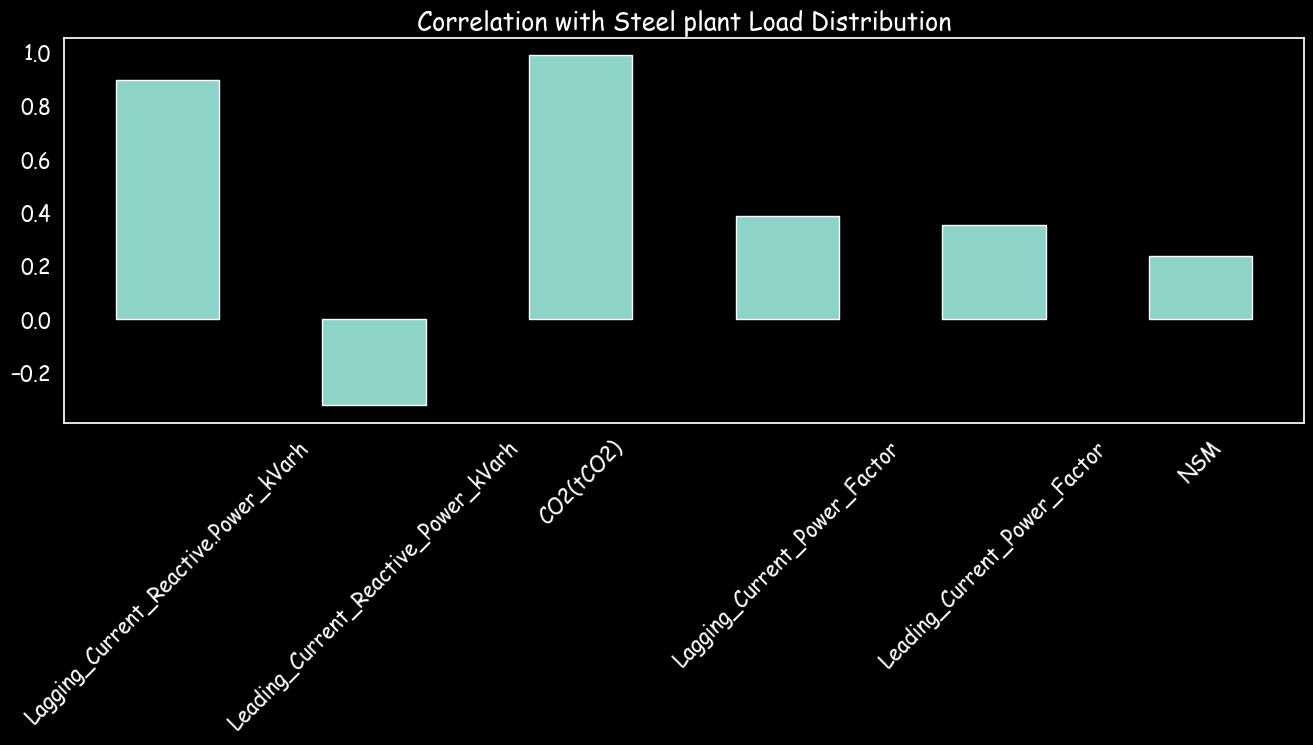

In [13]:
# Drop non-numeric columns
numeric_df = df.drop(columns=['date', 'WeekStatus', 'Day_of_week', 'Load_Type'])

# Convert all remaining columns to numeric (if possible)
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
numeric_df = numeric_df.dropna()

# Separate features and target variable
X = numeric_df.drop(['Usage_kWh'], axis=1)
y = numeric_df['Usage_kWh']

# Calculate correlation with response variable
corr = X.corrwith(y)

# Plot correlation values
corr.plot.bar(figsize=(16, 5), title="Correlation with Steel plant Load Distribution", fontsize=15, rot=45, grid=False)
plt.show()

In [14]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'
print(f"\033[94m\033[1m")
print(color.BOLD + 'Missing values - Percentage: \n' + color.END)
print(f"\033[91m\033[1m")
print(round(df.isnull().mean() * 100, 2))


Missing values - Percentage: 


date                                    0.0
Usage_kWh                               0.0
Lagging_Current_Reactive.Power_kVarh    0.0
Leading_Current_Reactive_Power_kVarh    0.0
CO2(tCO2)                               0.0
Lagging_Current_Power_Factor            0.0
Leading_Current_Power_Factor            0.0
NSM                                     0.0
WeekStatus                              0.0
Day_of_week                             0.0
Load_Type                               0.0
dtype: float64


In [31]:
cat = df.select_dtypes(include='object').columns.tolist()

for col in df[cat]:
    print(f"\033[94m\033[1m")
    print(col,"\n")
    print(f"\033[91m\033[1m")
    print(df[col].value_counts())
    print(f"\033[92m\033[1m")
    print("======="*5)


date 


date
01/01/2018 00:15    1
01/09/2018 08:45    1
01/09/2018 07:15    1
01/09/2018 07:30    1
01/09/2018 07:45    1
                   ..
02/05/2018 14:45    1
02/05/2018 14:30    1
02/05/2018 14:15    1
02/05/2018 14:00    1
31/12/2018 00:00    1
Name: count, Length: 35040, dtype: int64


WeekStatus 


WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64


Day_of_week 


Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64


Load_Type 


Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64



In [32]:
#Rename some columns
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Reactive_Power_kVarh',
                        'Leading_Current_Reactive_Power_kVarh': 'Leading_Reactive_Power_kVarh',
                        'Lagging_Current_Power_Factor': 'Lagging_Power_Factor',
                        'Leading_Current_Power_Factor': 'Leading_Power_Factor',
                        'CO2(tCO2)':'CO2'})
df.head()

date  Usage_kWh  Lagging_Reactive_Power_kVarh  \
0  01/01/2018 00:15       3.17                          2.95   
1  01/01/2018 00:30       4.00                          4.46   
2  01/01/2018 00:45       3.24                          3.28   
3  01/01/2018 01:00       3.31                          3.56   
4  01/01/2018 01:15       3.82                          4.50   

   Leading_Reactive_Power_kVarh  CO2  Lagging_Power_Factor  \
0                           0.0  0.0                 73.21   
1                           0.0  0.0                 66.77   
2                           0.0  0.0                 70.28   
3                           0.0  0.0                 68.09   
4                           0.0  0.0                 64.72   

   Leading_Power_Factor   NSM WeekStatus Day_of_week   Load_Type  
0                 100.0   900    Weekday      Monday  Light_Load  
1                 100.0  1800    Weekday      Monday  Light_Load  
2                 100.0  2700    Weekday      Monday  Light_Load  
3                 100.0  3600    Weekday      Monday  Light_Load  
4                 100.0  4500    Weekday      Monday  Light_Load

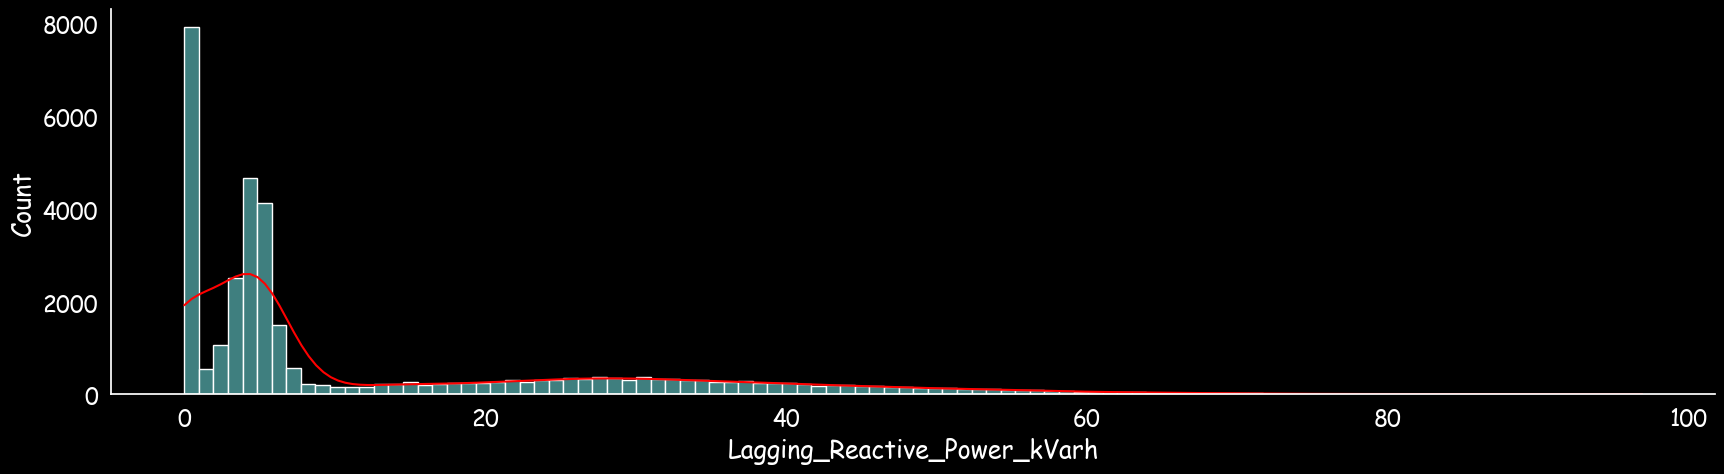

In [33]:
sns.displot(data=df, x="Lagging_Reactive_Power_kVarh", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

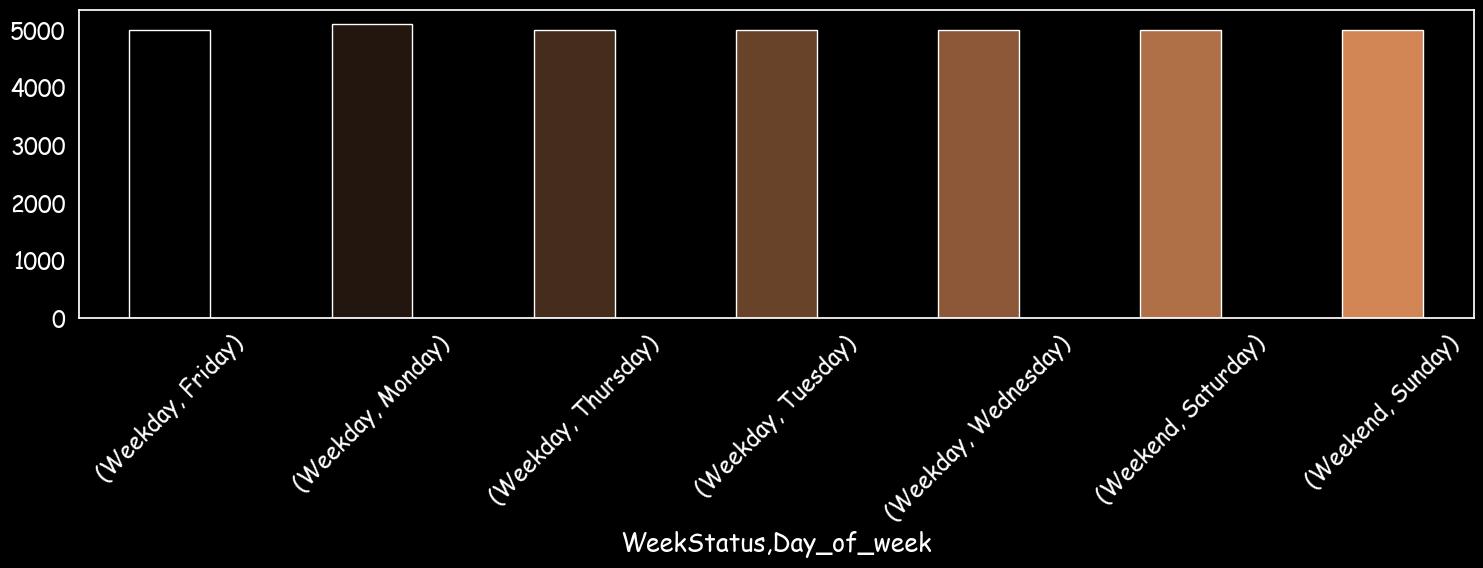

In [34]:
plt.figure(figsize=(18,4))
color = plt.cm.copper(np.linspace(0, 1, 10))
df.groupby(['WeekStatus','Day_of_week'])['Usage_kWh'].count().plot(kind='bar', width=.4,color=color);
plt.xticks(rotation=45);

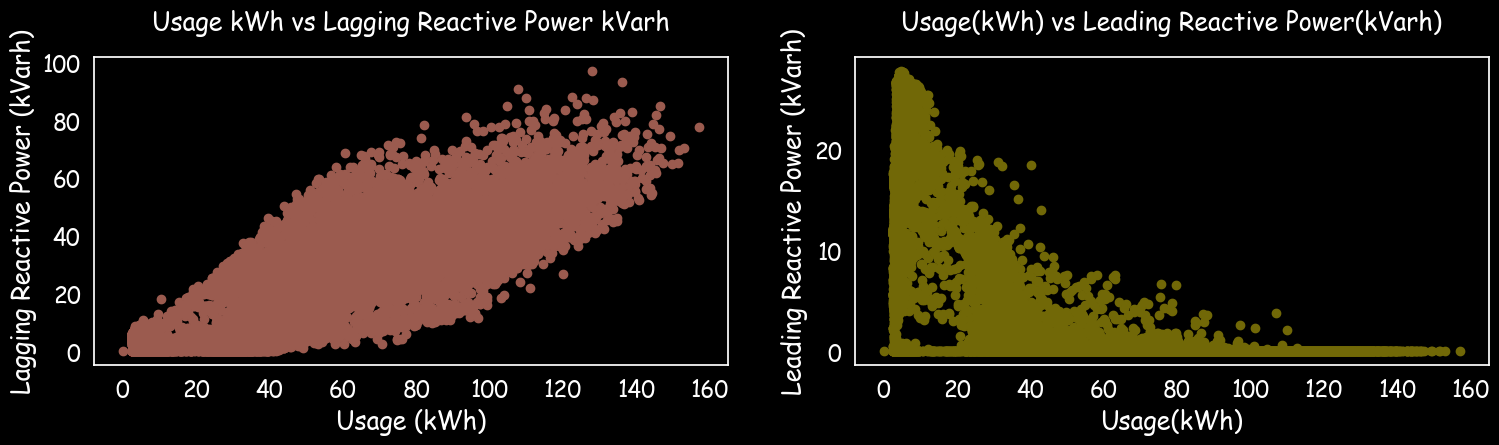

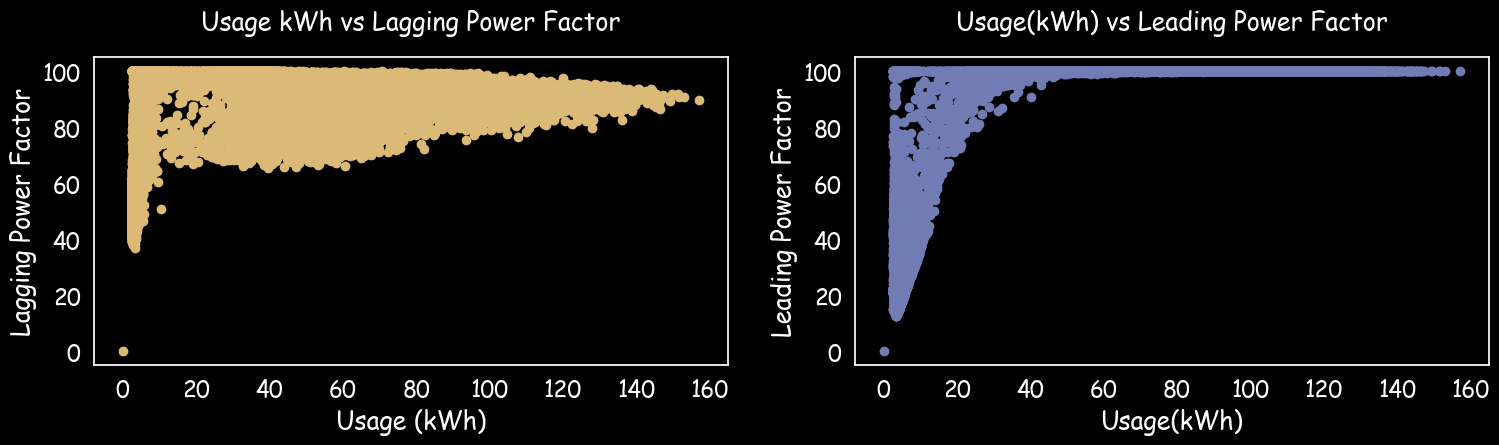

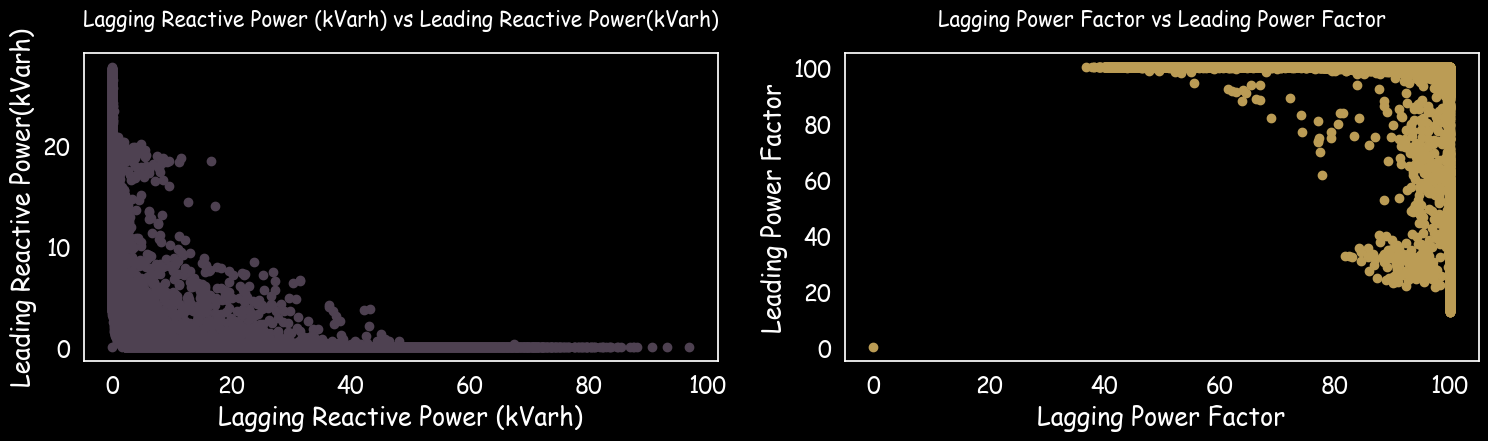

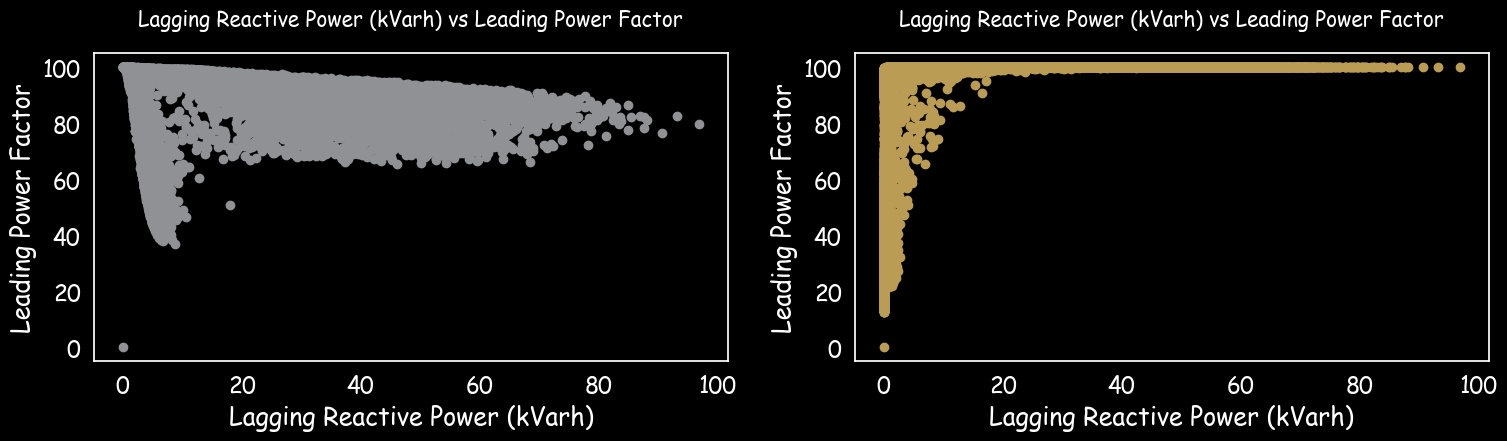

In [35]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(18,4))
fig, (ax3,ax4) =plt.subplots(1,2, figsize=(18,4))
fig, (ax5,ax6) =plt.subplots(1,2, figsize=(18,4))
fig, (ax7,ax8) =plt.subplots(1,2, figsize=(18,4))

ax1.scatter(data=df,x="Usage_kWh", y="Lagging_Reactive_Power_kVarh", color=colors[1])
ax1.set_title("Usage kWh vs Lagging Reactive Power kVarh",pad=20)
ax1.set_xlabel("Usage (kWh)")
ax1.set_ylabel("Lagging Reactive Power (kVarh)")

ax2.scatter(data=df,x="Usage_kWh",y="Leading_Reactive_Power_kVarh", color=colors[8])
ax2.set_title("Usage(kWh) vs Leading Reactive Power(kVarh)",pad=20)
ax2.set_xlabel("Usage(kWh)")
ax2.set_ylabel("Leading Reactive Power (kVarh)")

ax3.scatter(data=df,x="Usage_kWh", y="Lagging_Power_Factor", color=colors[3])
ax3.set_title("Usage kWh vs Lagging Power Factor",pad=20)
ax3.set_xlabel("Usage (kWh)")
ax3.set_ylabel("Lagging Power Factor")

ax4.scatter(data=df,x="Usage_kWh",y="Leading_Power_Factor", color=colors[9]) 
ax4.set_title("Usage(kWh) vs Leading Power Factor",pad=20)
ax4.set_xlabel("Usage(kWh)")
ax4.set_ylabel("Leading Power Factor")

ax5.scatter(data=df,x="Lagging_Reactive_Power_kVarh",y="Leading_Reactive_Power_kVarh", color=colors[2]) 
ax5.set_title("Lagging Reactive Power (kVarh) vs Leading Reactive Power(kVarh)",pad=20,fontsize=15)
ax5.set_xlabel("Lagging Reactive Power (kVarh)")
ax5.set_ylabel("Leading Reactive Power(kVarh)")

ax6.scatter(data=df,x="Lagging_Power_Factor",y="Leading_Power_Factor", color=colors[4]) 
ax6.set_title("Lagging Power Factor vs Leading Power Factor",pad=20,fontsize=15)
ax6.set_xlabel("Lagging Power Factor")
ax6.set_ylabel("Leading Power Factor")

ax7.scatter(data=df,x="Lagging_Reactive_Power_kVarh",y="Lagging_Power_Factor", color=colors[5]) 
ax7.set_title("Lagging Reactive Power (kVarh) vs Leading Power Factor",pad=20,fontsize=15)
ax7.set_xlabel("Lagging Reactive Power (kVarh)")
ax7.set_ylabel("Leading Power Factor")

ax8.scatter(data=df,x="Lagging_Reactive_Power_kVarh",y="Leading_Power_Factor", color=colors[4]) 
ax8.set_title("Lagging Reactive Power (kVarh) vs Leading Power Factor",pad=20,fontsize=15)
ax8.set_xlabel("Lagging Reactive Power (kVarh)")
ax8.set_ylabel("Leading Power Factor")

plt.show()

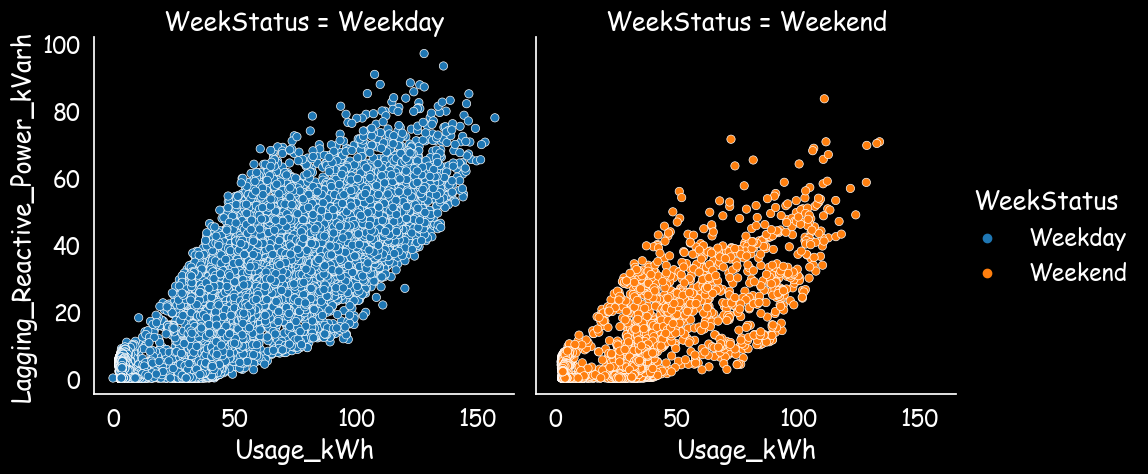

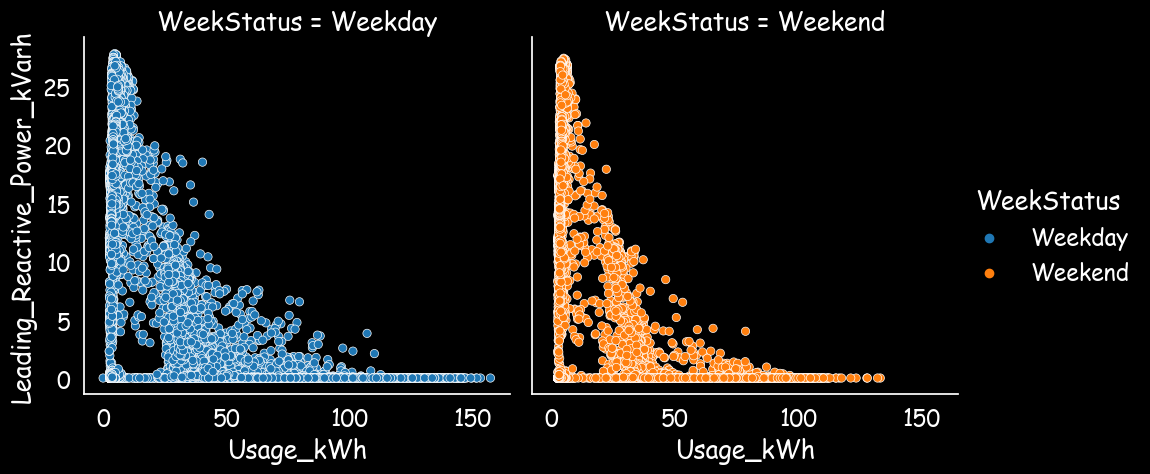

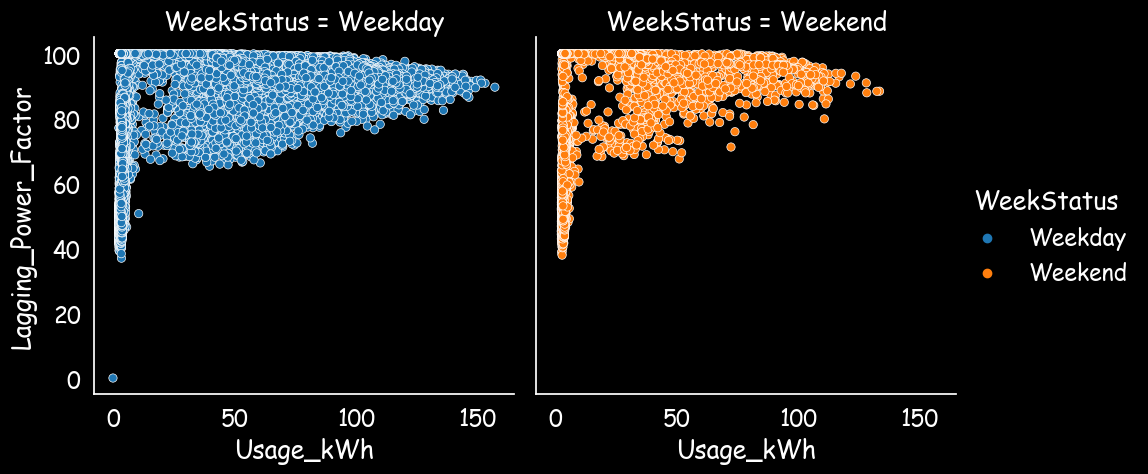

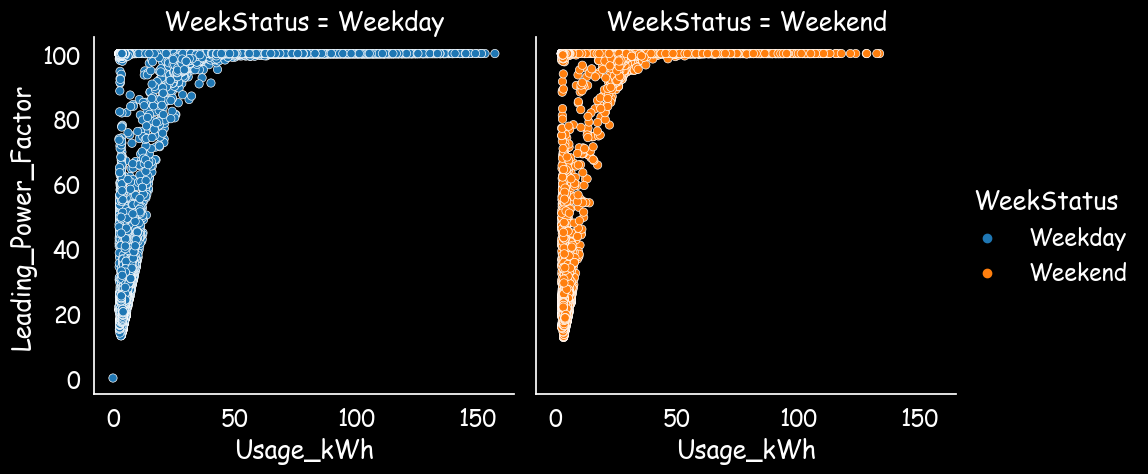

In [36]:
sns.relplot(data=df, x="Usage_kWh", y="Lagging_Reactive_Power_kVarh", hue="WeekStatus",col="WeekStatus",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Leading_Reactive_Power_kVarh", hue="WeekStatus",col="WeekStatus",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Lagging_Power_Factor", hue="WeekStatus",col="WeekStatus",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Leading_Power_Factor", hue="WeekStatus",col="WeekStatus",palette='tab10');

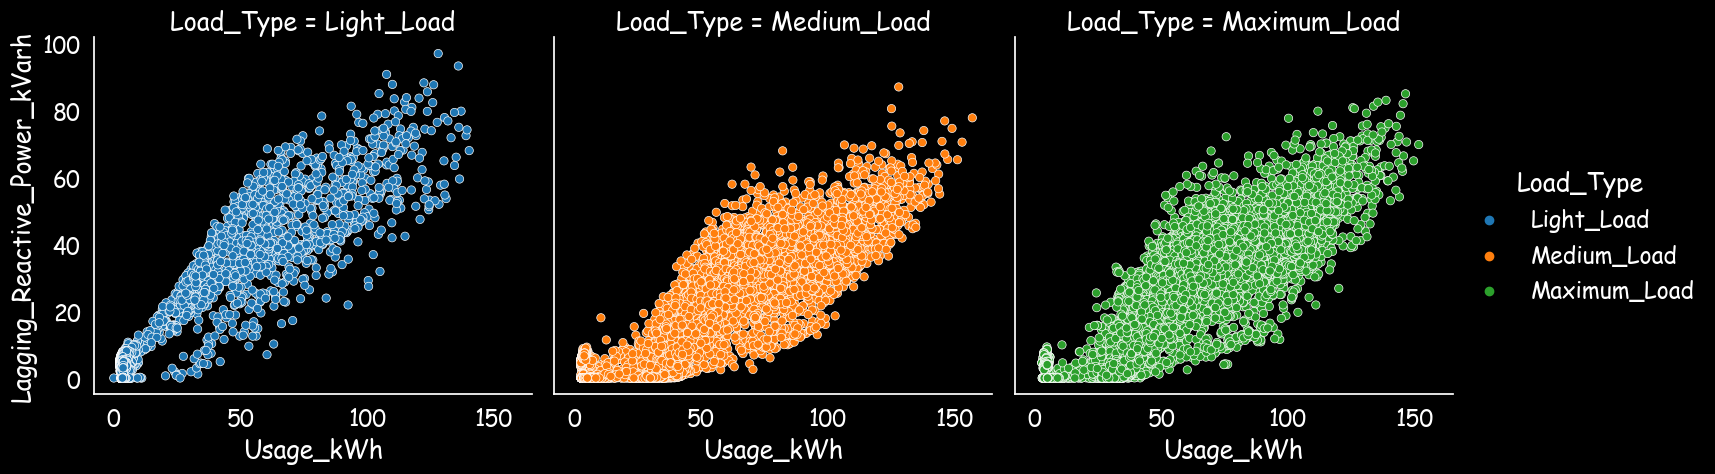

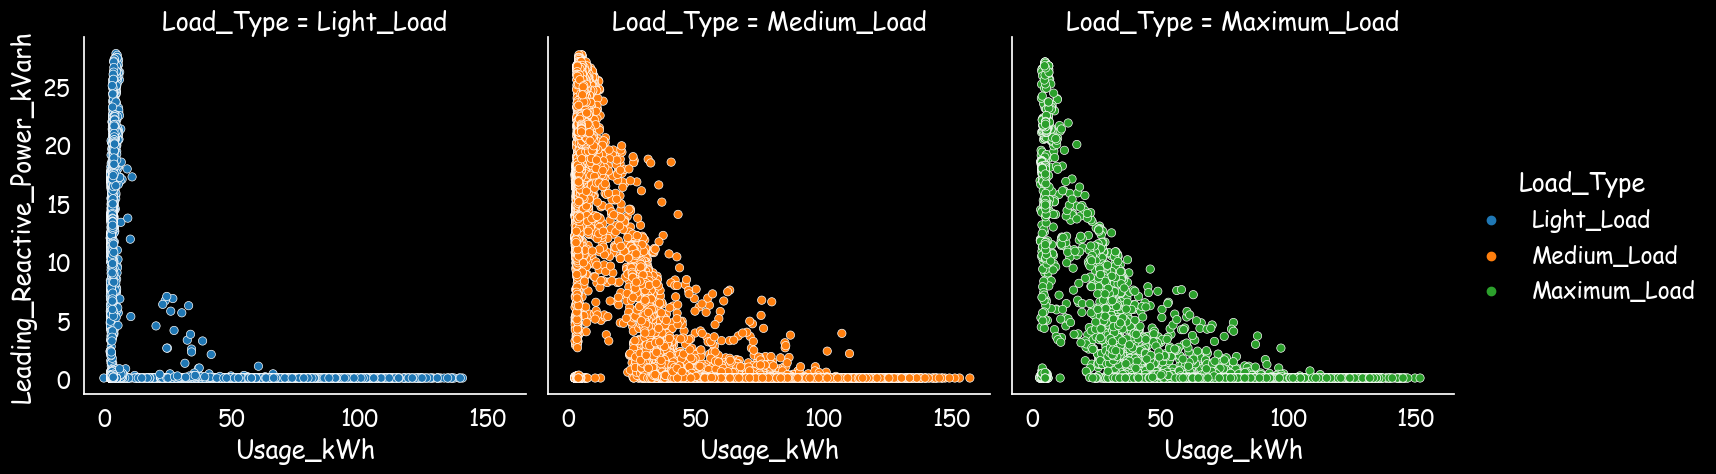

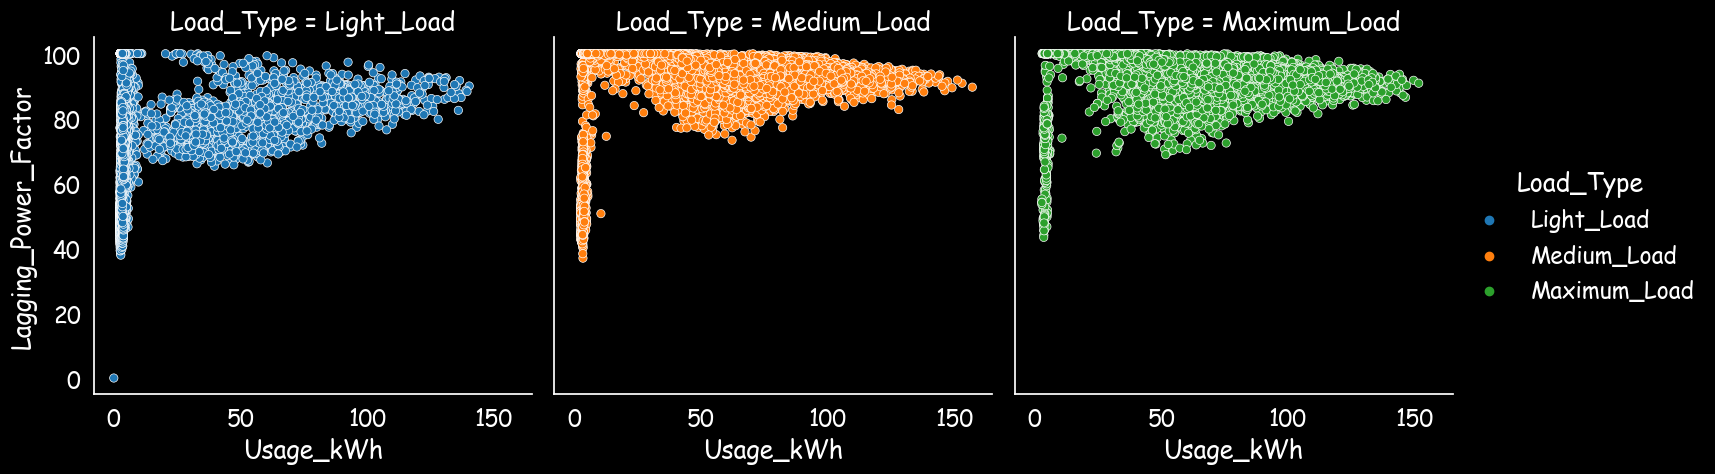

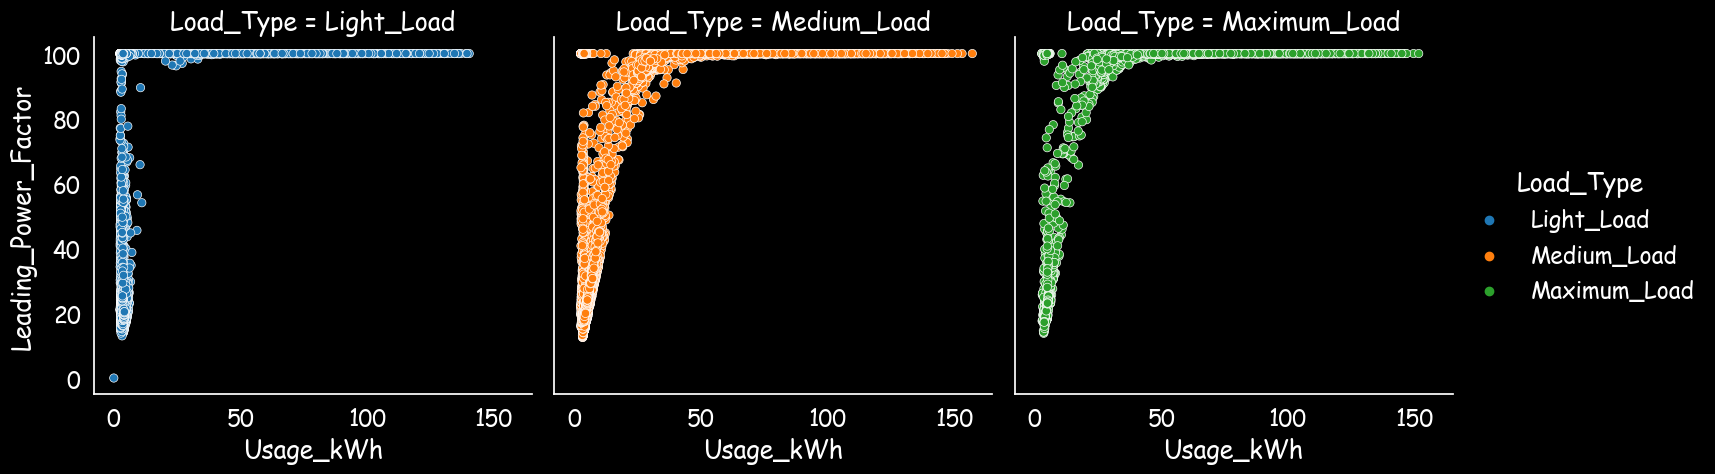

In [37]:
sns.relplot(data=df, x="Usage_kWh", y="Lagging_Reactive_Power_kVarh", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Leading_Reactive_Power_kVarh", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Lagging_Power_Factor", hue="Load_Type",col="Load_Type",palette='tab10');
sns.relplot(data=df, x="Usage_kWh", y="Leading_Power_Factor", hue="Load_Type",col="Load_Type",palette='tab10');

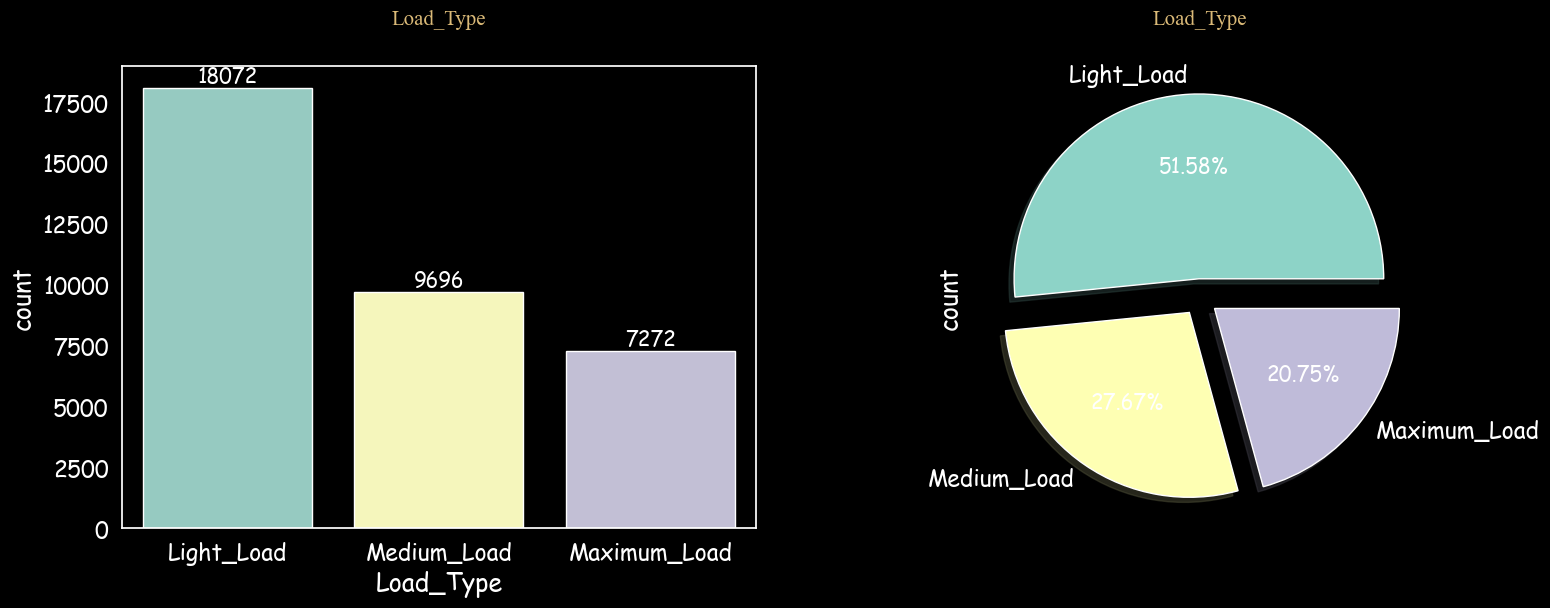

In [38]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Load_Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Load_Type", fontsize=20,color='#dbba78',font='Times New Roman',pad=30)
ax =plt.subplot(1,2,2)
ax=df['Load_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Load_Type", fontsize = 20,color='#dbba78',font='Times New Roman',pad=30);

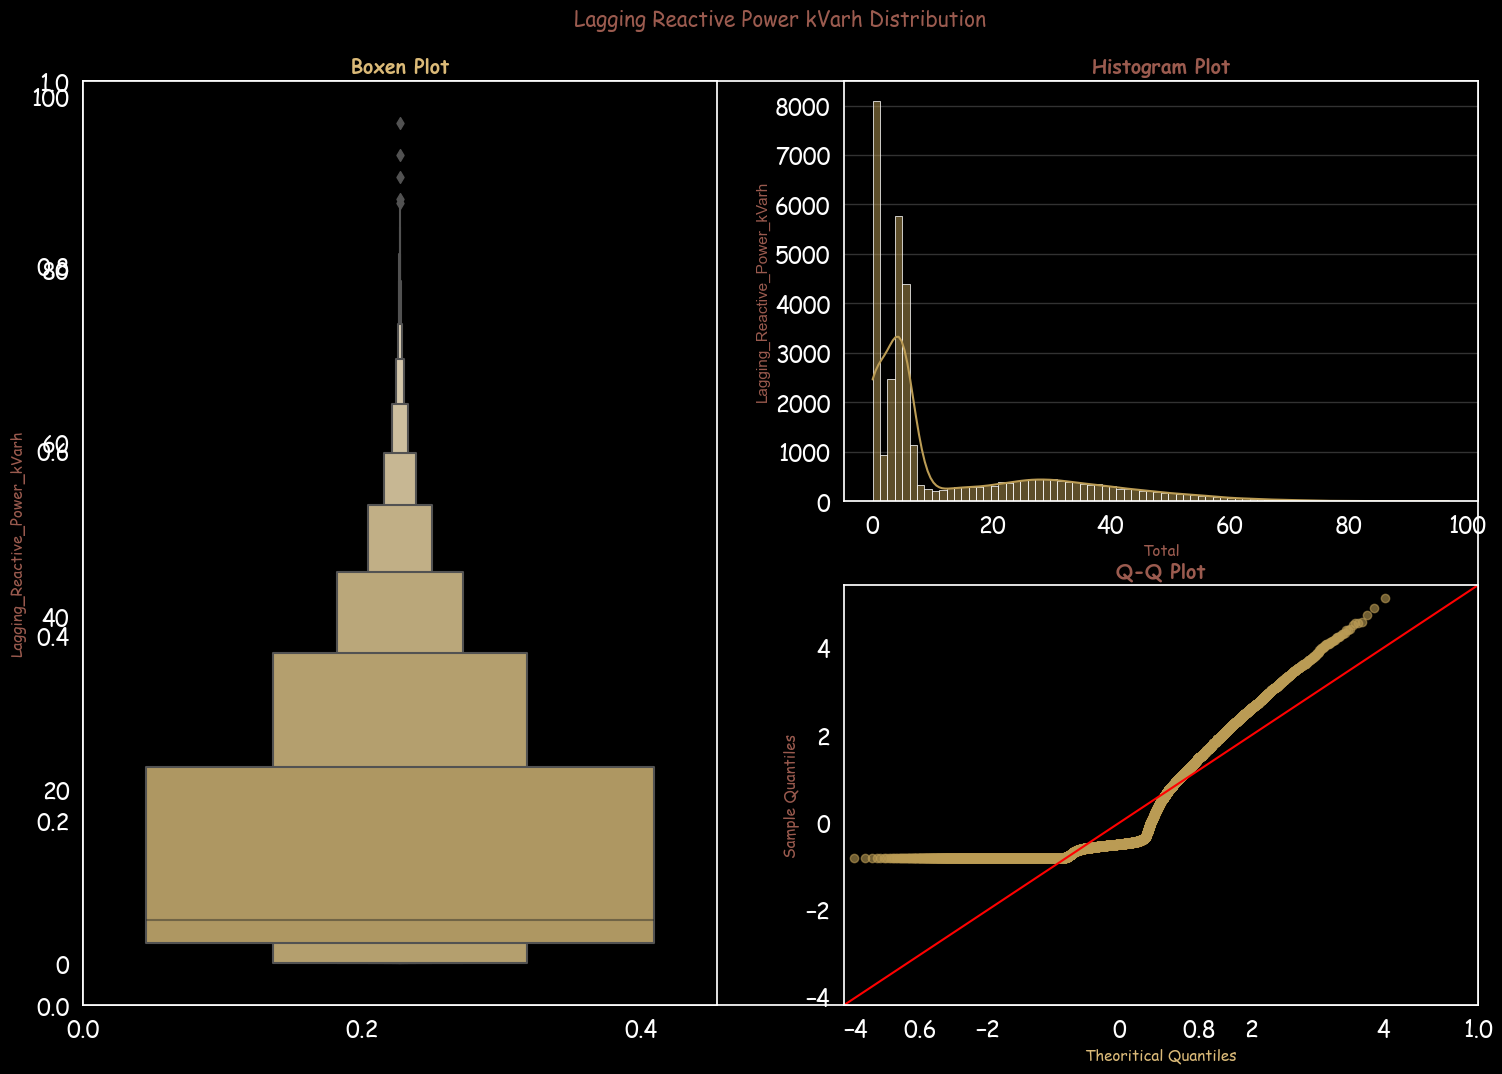

In [39]:
from statsmodels.graphics.gofplots import qqplot

var = df['Lagging_Reactive_Power_kVarh']
color = colors[4]
fig = plt.figure(figsize = (18, 12))

# --- Title ---
plt.title("Lagging Reactive Power kVarh Distribution",fontsize=20,font='Comic Sans MS',pad=40,color = colors[1])

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'Comic Sans MS', color = colors[1])
sns.histplot(data = df, x = var, kde = True, color = color)
plt.xlabel('Total', fontweight = 'regular', fontsize = 11, fontfamily = 'Comic Sans MS', color = colors[1])
plt.ylabel('Lagging_Reactive_Power_kVarh', fontweight = 'regular', fontsize = 11, fontfamily = 'sans-serif', color = colors[1])
plt.grid(axis = 'x', alpha = 0)
plt.grid(axis = 'y', alpha = 0.2)

# --- Q-Q Plot ---
ax_2 = fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'Comic Sans MS', color = colors[1])
qqplot(var, fit = True, line = '45', ax = ax_2, markerfacecolor = color, markeredgecolor = color, alpha = 0.6)
plt.xlabel('Theoritical Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'Comic Sans MS', 
           color = colors[3])
plt.ylabel('Sample Quantiles', fontweight = 'regular', fontsize = 11, fontfamily = 'Comic Sans MS', color = colors[1])

# --- Boxen Plot ---
ax_3 = fig.add_subplot(1, 2, 1)
plt.title('Boxen Plot', fontweight = 'bold', fontsize = 14, fontfamily = 'Comic Sans MS', color = colors[3])
sns.boxenplot(y = var, data = df, color = color, linewidth = 1.5)
plt.ylabel('Lagging_Reactive_Power_kVarh', fontweight = 'regular', fontsize = 11, fontfamily = 'Comic Sans MS', color = colors[1])

plt.show();

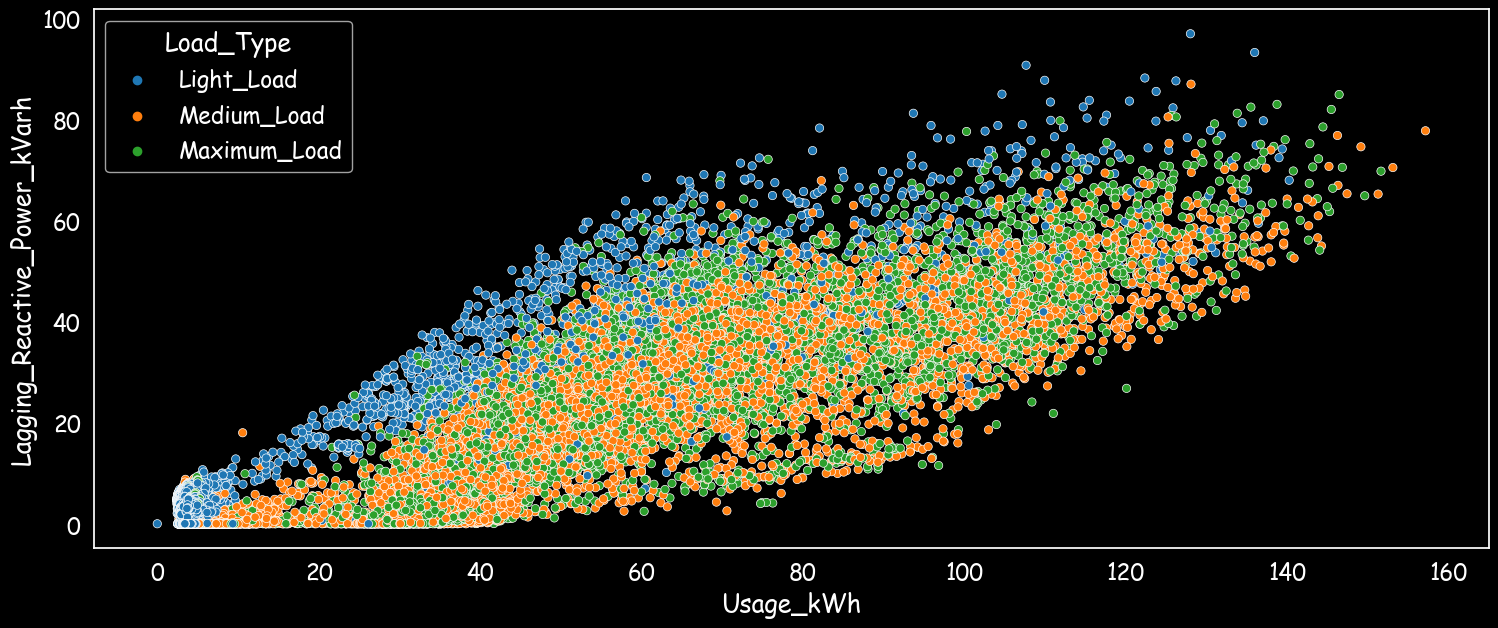

In [41]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Usage_kWh", y="Lagging_Reactive_Power_kVarh", hue="Load_Type",palette="tab10");

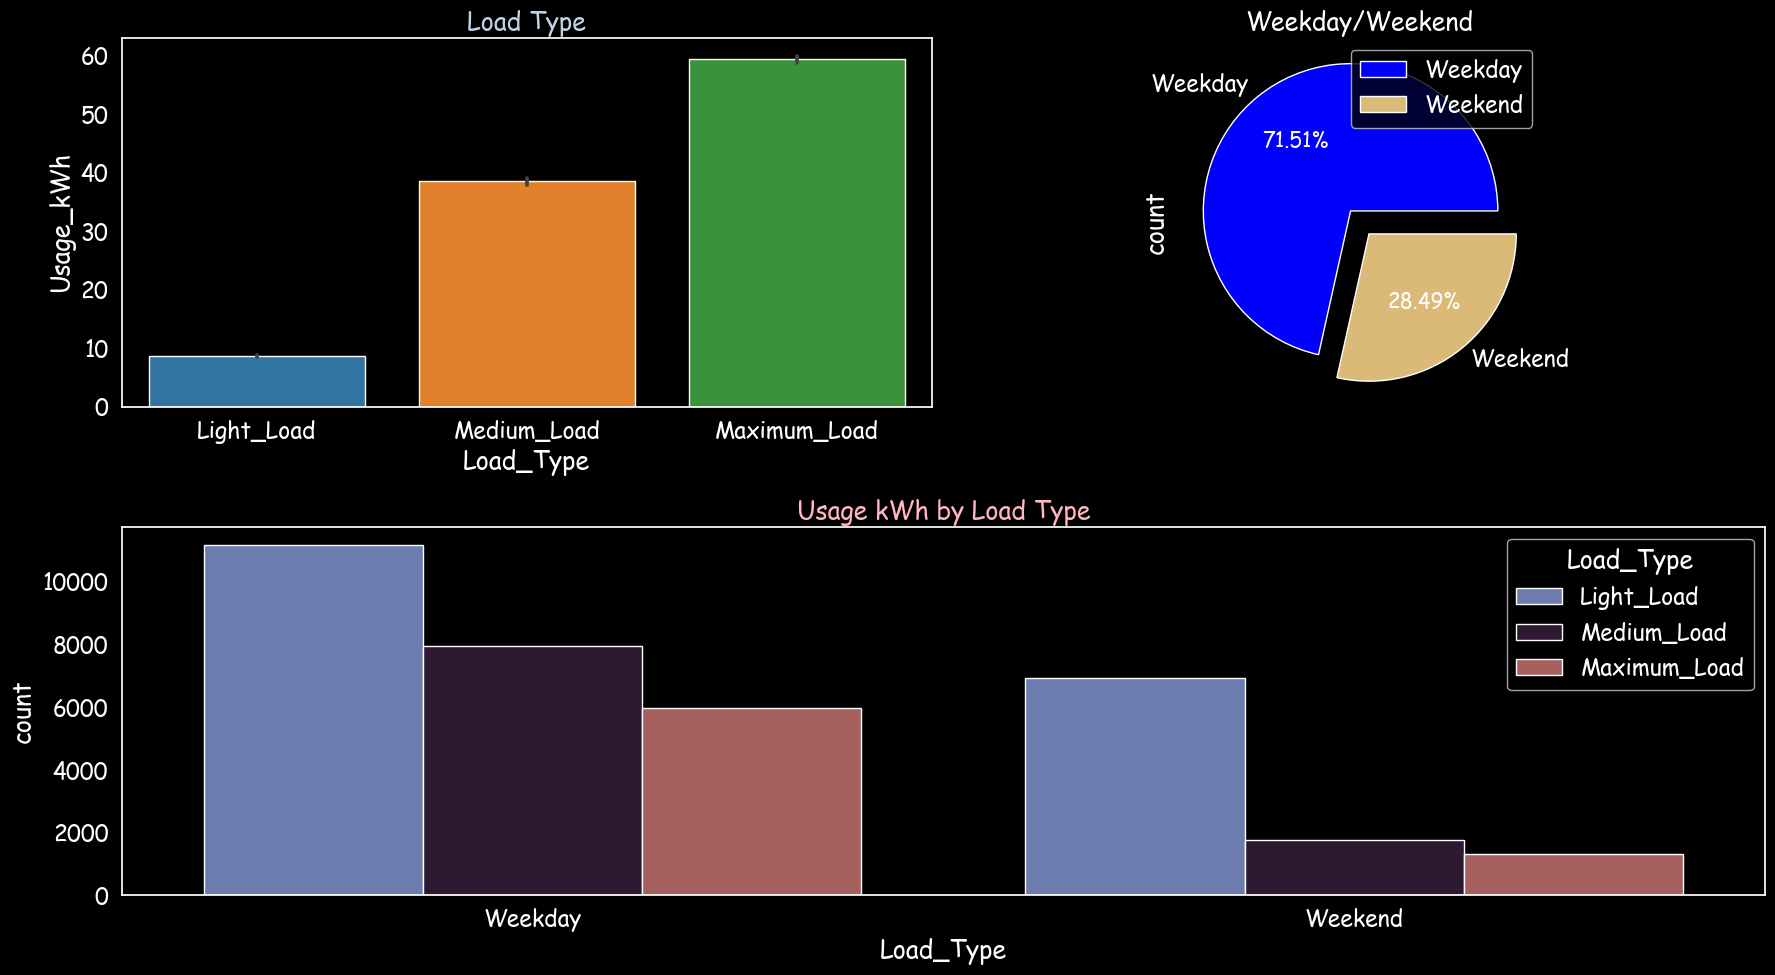

In [42]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.barplot(x = 'Load_Type', y = 'Usage_kWh', palette= "tab10",data=df)
plt.title("Load Type", color = "#bfd3e6")
plt.xlabel("Load_Type")
plt.ylabel("Usage_kWh")

plt.subplot(2,2,2)
df["WeekStatus"].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1, 0.1], colors=['blue','#dbba78'])
p = plt.gcf()
plt.title("Weekday/Weekend")
plt.legend()
plt.subplot(2,2,(3,4))

sns.countplot(x = 'WeekStatus', hue = 'Load_Type', data = df, palette="twilight")
plt.title("Usage kWh by Load Type", color = "Lightpink")
plt.xlabel("Load_Type")
plt.tight_layout()
plt.show()

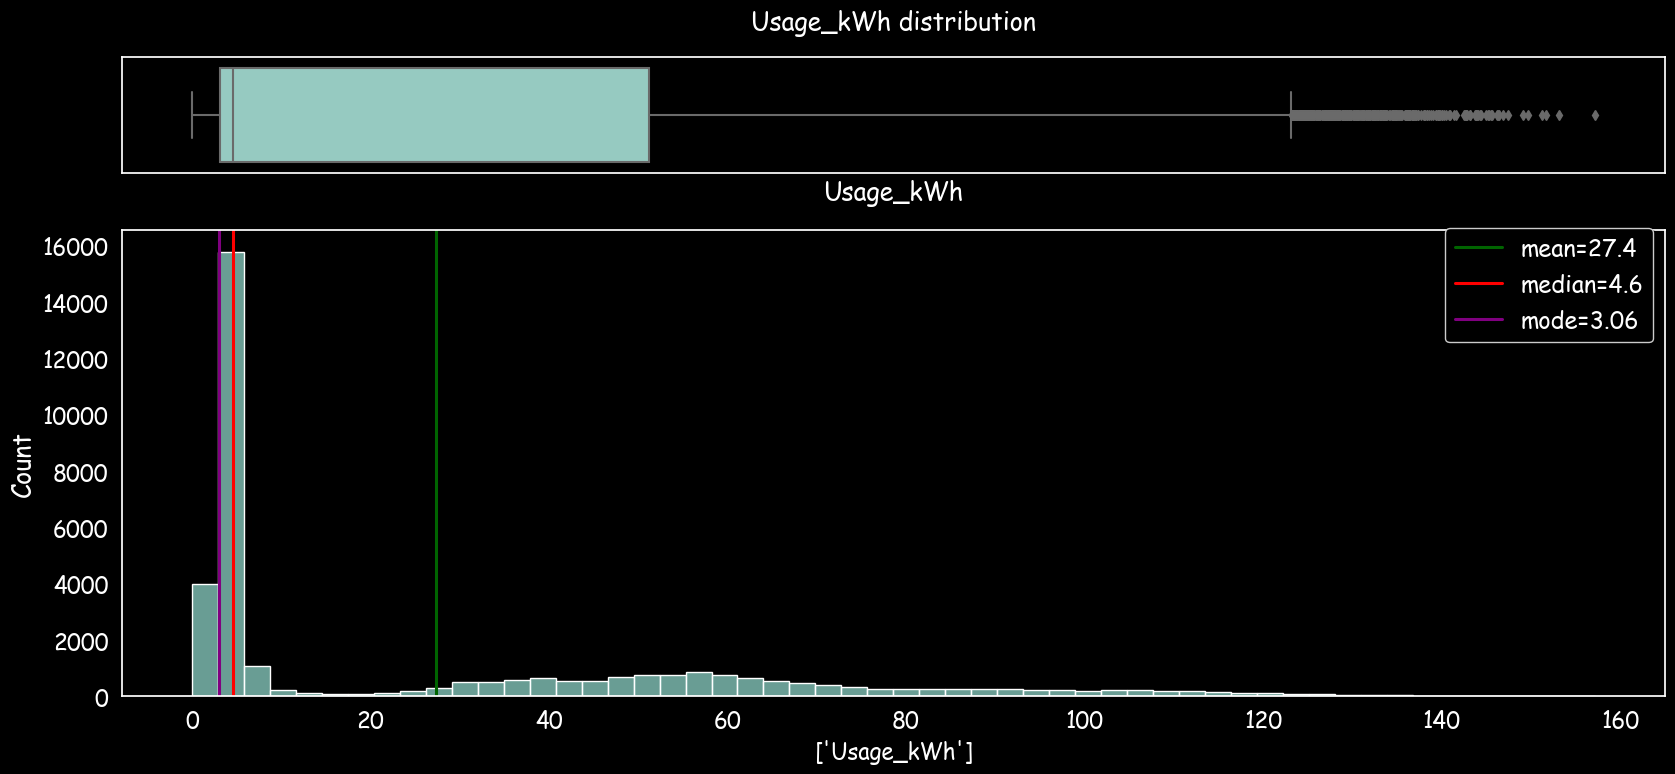

In [43]:
col = ['Usage_kWh']
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,8),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('Usage_kWh distribution',fontsize=18,pad=20)
sns.boxplot(x='Usage_kWh', data=df, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='Usage_kWh', data=df, ax=ax[1])
ax[1].set_xlabel(col, fontsize=16)
plt.axvline(df['Usage_kWh'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df['Usage_kWh'].mean(),1)))
plt.axvline(df['Usage_kWh'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df['Usage_kWh'].median(),1)))
plt.axvline(df['Usage_kWh'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df['Usage_kWh'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

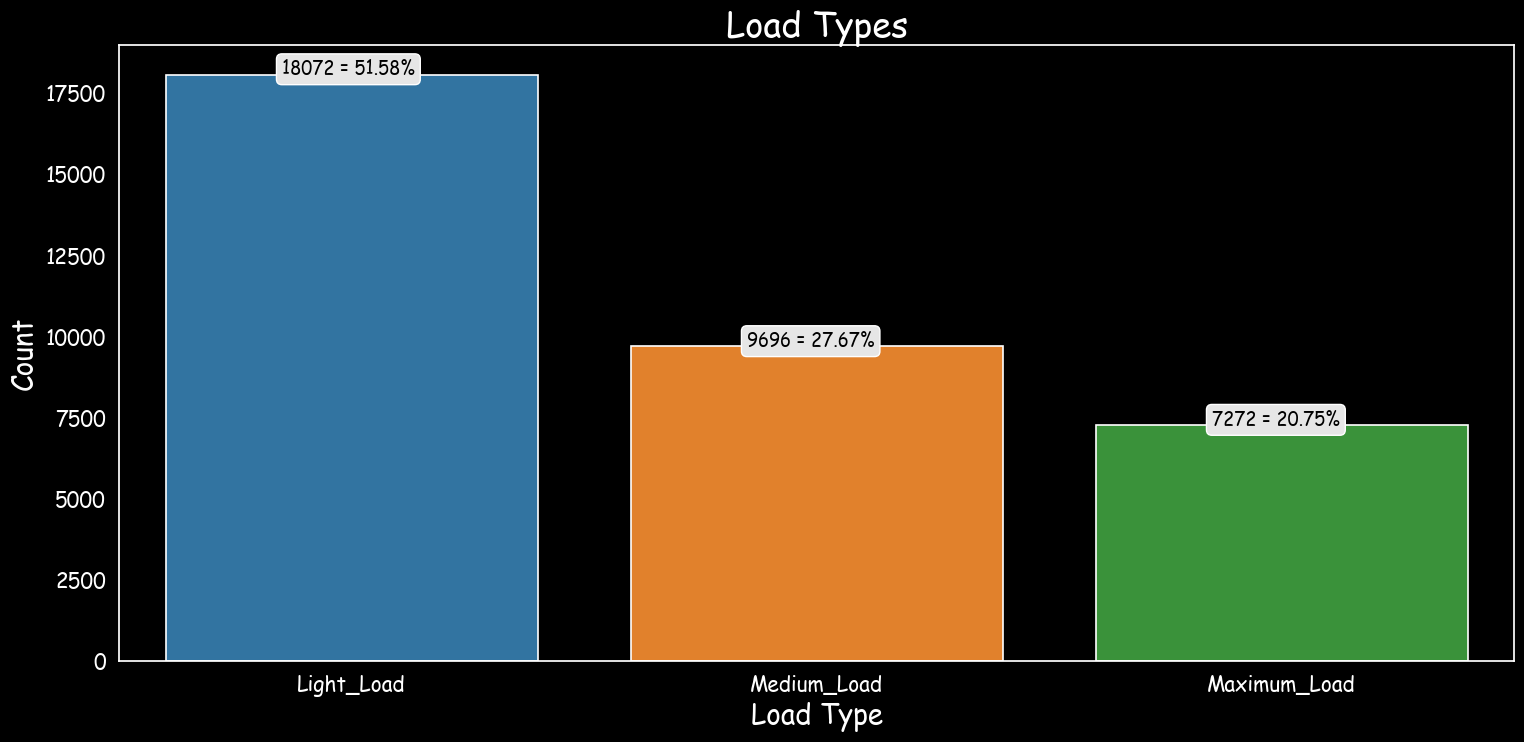

In [44]:
#Disaster count(Whether the disaster happened or not )
plt.figure(figsize = (18, 8))
ax = plt.axes()
ax.set_facecolor('black')
ax = sns.countplot(x = 'Load_Type', data = df, palette = 'tab10', edgecolor = 'white', linewidth = 1.2)
plt.title('Load Types', fontsize = 25)
plt.xlabel('Load Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(df['Load_Type'])) * 100), (p.get_x() + 0.25, p.get_height() + 10), 
                   color = 'black',
                   bbox = bbox_args,
                   fontsize = 13)
plt.show()

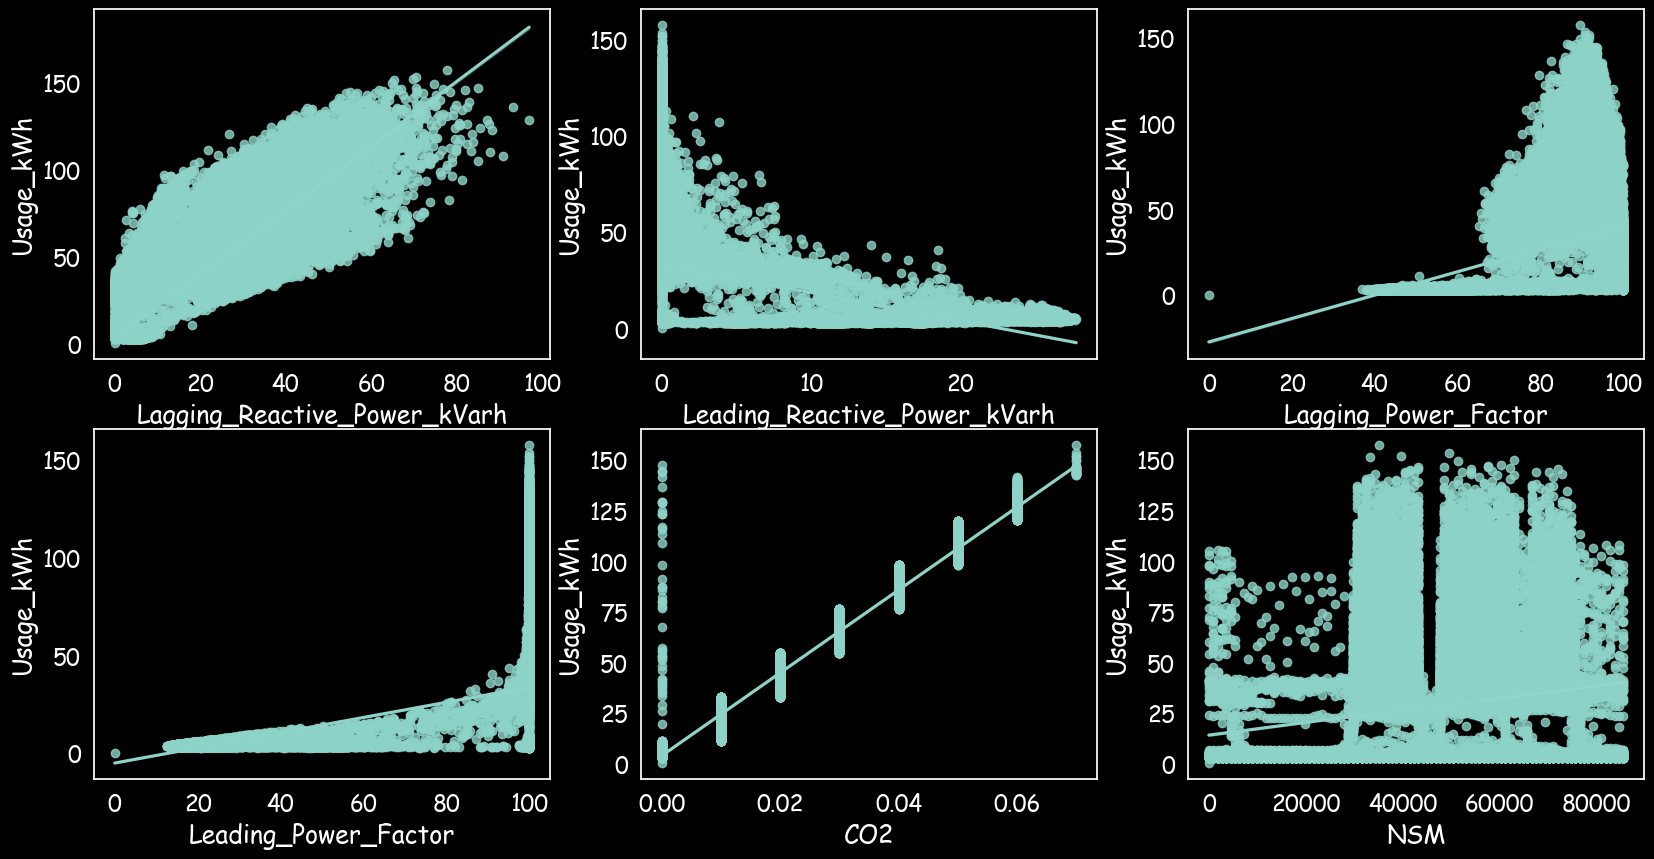

In [45]:
col_names = ['Lagging_Reactive_Power_kVarh','Leading_Reactive_Power_kVarh','Lagging_Power_Factor','Leading_Power_Factor','CO2',"NSM"]
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
for i in range(0, len(col_names)):
    rows = i // 3 
    cols = i % 3
    ax = axs[rows,cols]
    plot = sns.regplot(x = col_names[i], y = 'Usage_kWh', data = df, ax = ax )


Skewness: Usage_kWh = 1.197
Kurtosis: Usage_kWh = 0.39
Mean: Usage_kWh = 27.39
Max: Usage_kWh = 157.18
Min: Usage_kWh = 0.0
Median: Usage_kWh = 4.57
Std: Usage_kWh = 33.44
Var: Usage_kWh = 1118.53
Mode: Usage_kWh = 0    3.06
Name: Usage_kWh, dtype: float64


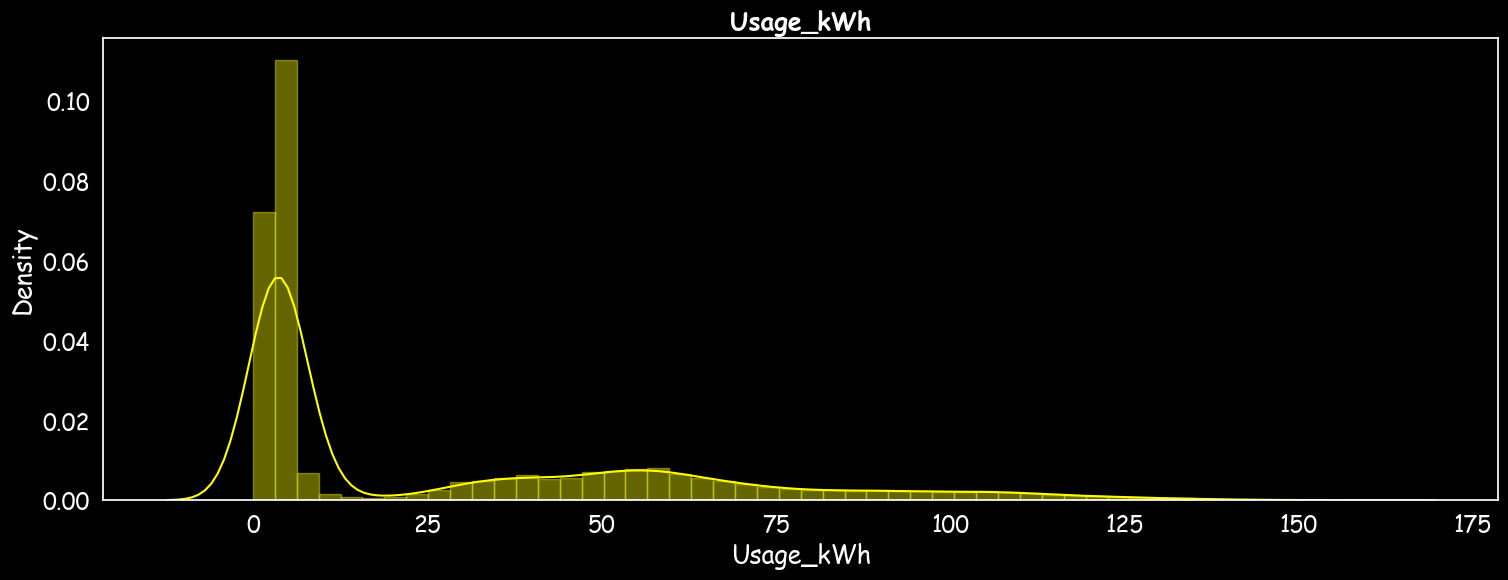



Skewness: Lagging_Reactive_Power_kVarh = 1.438
Kurtosis: Lagging_Reactive_Power_kVarh = 1.21
Mean: Lagging_Reactive_Power_kVarh = 13.04
Max: Lagging_Reactive_Power_kVarh = 96.91
Min: Lagging_Reactive_Power_kVarh = 0.0
Median: Lagging_Reactive_Power_kVarh = 5.0
Std: Lagging_Reactive_Power_kVarh = 16.31
Var: Lagging_Reactive_Power_kVarh = 265.89
Mode: Lagging_Reactive_Power_kVarh = 0    0.0
Name: Lagging_Reactive_Power_kVarh, dtype: float64


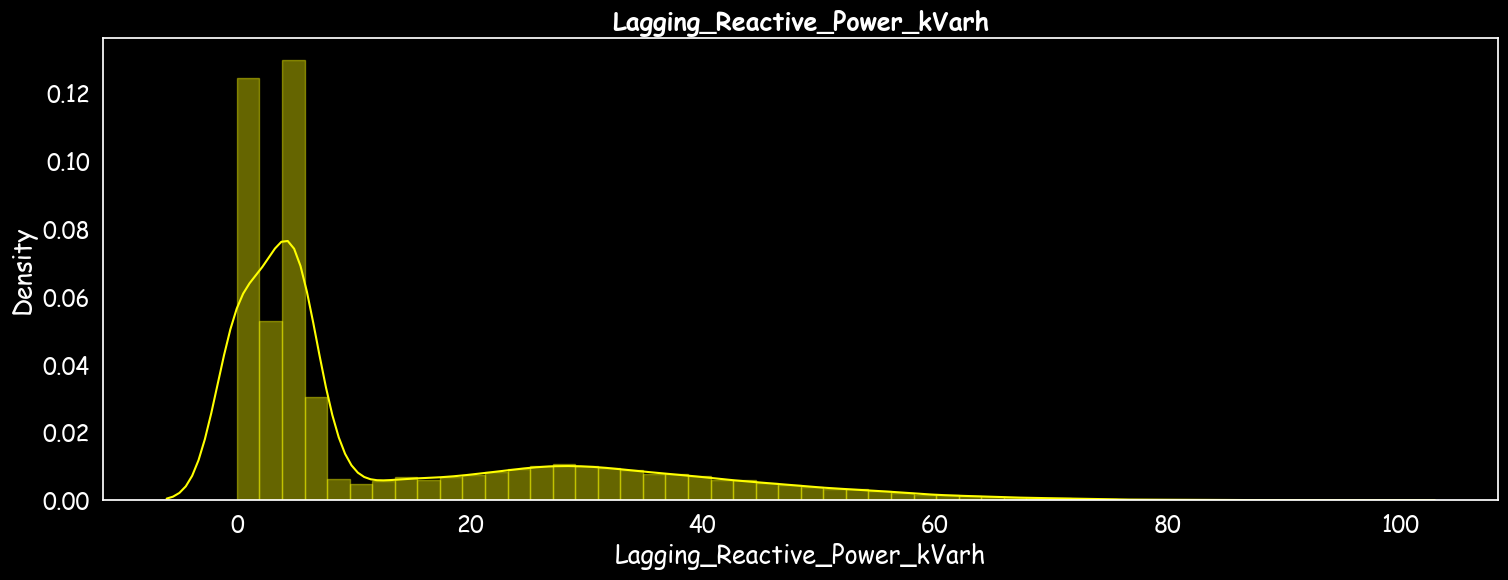



Skewness: Leading_Reactive_Power_kVarh = 1.734
Kurtosis: Leading_Reactive_Power_kVarh = 1.58
Mean: Leading_Reactive_Power_kVarh = 3.87
Max: Leading_Reactive_Power_kVarh = 27.76
Min: Leading_Reactive_Power_kVarh = 0.0
Median: Leading_Reactive_Power_kVarh = 0.0
Std: Leading_Reactive_Power_kVarh = 7.42
Var: Leading_Reactive_Power_kVarh = 55.12
Mode: Leading_Reactive_Power_kVarh = 0    0.0
Name: Leading_Reactive_Power_kVarh, dtype: float64


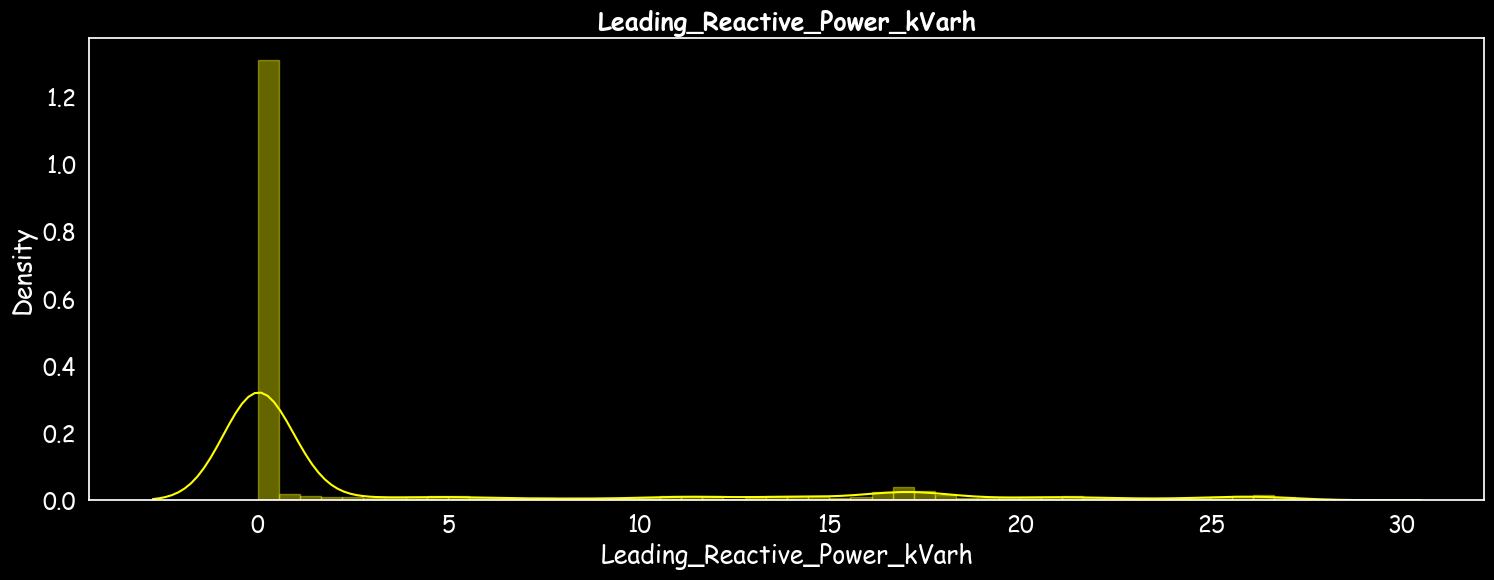



Skewness: Lagging_Power_Factor = -0.606
Kurtosis: Lagging_Power_Factor = -1.1
Mean: Lagging_Power_Factor = 80.58
Max: Lagging_Power_Factor = 100.0
Min: Lagging_Power_Factor = 0.0
Median: Lagging_Power_Factor = 87.96
Std: Lagging_Power_Factor = 18.92
Var: Lagging_Power_Factor = 358.02
Mode: Lagging_Power_Factor = 0    100.0
Name: Lagging_Power_Factor, dtype: float64


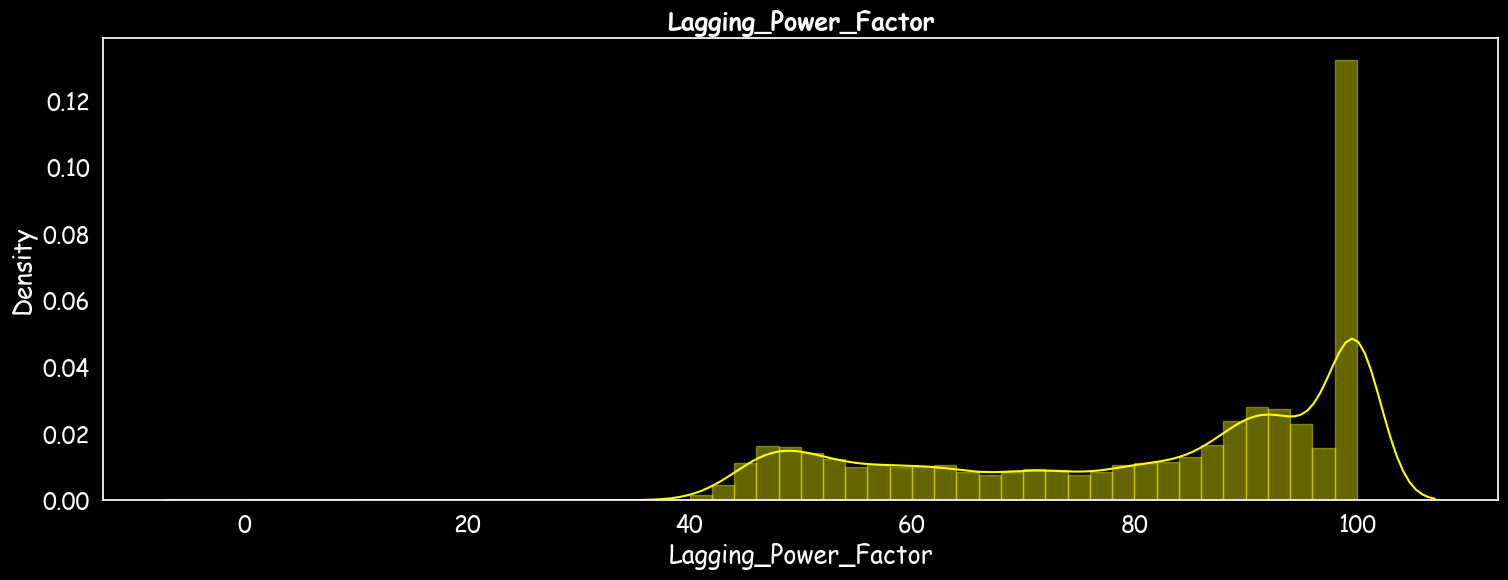



Skewness: Leading_Power_Factor = -1.512
Kurtosis: Leading_Power_Factor = 0.38
Mean: Leading_Power_Factor = 84.37
Max: Leading_Power_Factor = 100.0
Min: Leading_Power_Factor = 0.0
Median: Leading_Power_Factor = 100.0
Std: Leading_Power_Factor = 30.46
Var: Leading_Power_Factor = 927.6
Mode: Leading_Power_Factor = 0    100.0
Name: Leading_Power_Factor, dtype: float64


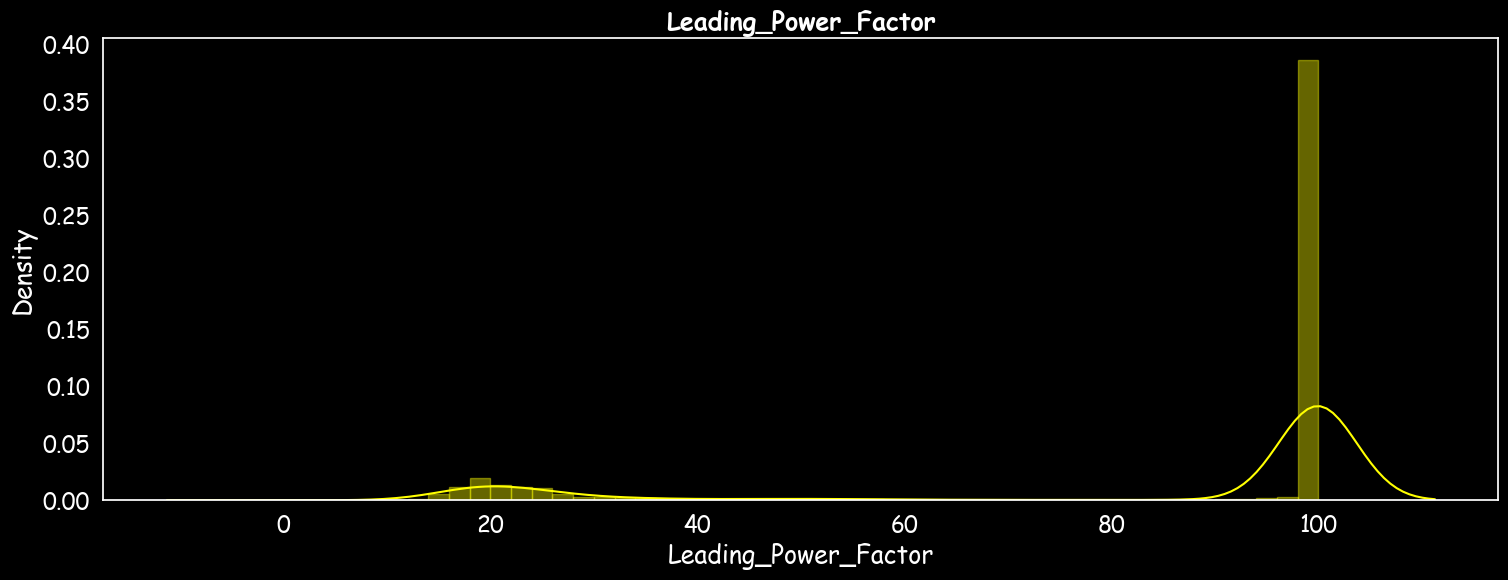

In [46]:
var = ['Usage_kWh', 'Lagging_Reactive_Power_kVarh','Leading_Reactive_Power_kVarh','Lagging_Power_Factor','Leading_Power_Factor']

from scipy.stats import skew

for col in df[var]:
    print(f"\033[91m\033[1m")
    print("Skewness:",col,"=",round(skew(df[col]),3))
    print("Kurtosis:",col,    "=",round(df[col].kurt(),2))
    print("Mean:",col,    "=",round(df[col].mean(),2))
    print("Max:",col,     "=",round(df[col].max(),2))
    print("Min:",col,     "=",round(df[col].min(),2))
    print("Median:",col,  "=",round(df[col].median(),2))
    print("Std:",col,     "=",round(df[col].std(),2))
    print("Var:",col,     "=",round(df[col].var(),2))
    print("Mode:",col,    "=",round(df[col].mode(),2))
    plt.figure(figsize=(18,6))
    sns.distplot(df[col],kde=True,bins=50,color="Yellow",hist_kws={"edgecolor": (1,1,0,1)})
    plt.title(col,fontweight="bold")
    plt.show()
    print(f"\033[93m\033[1m")
    print("====="*25)

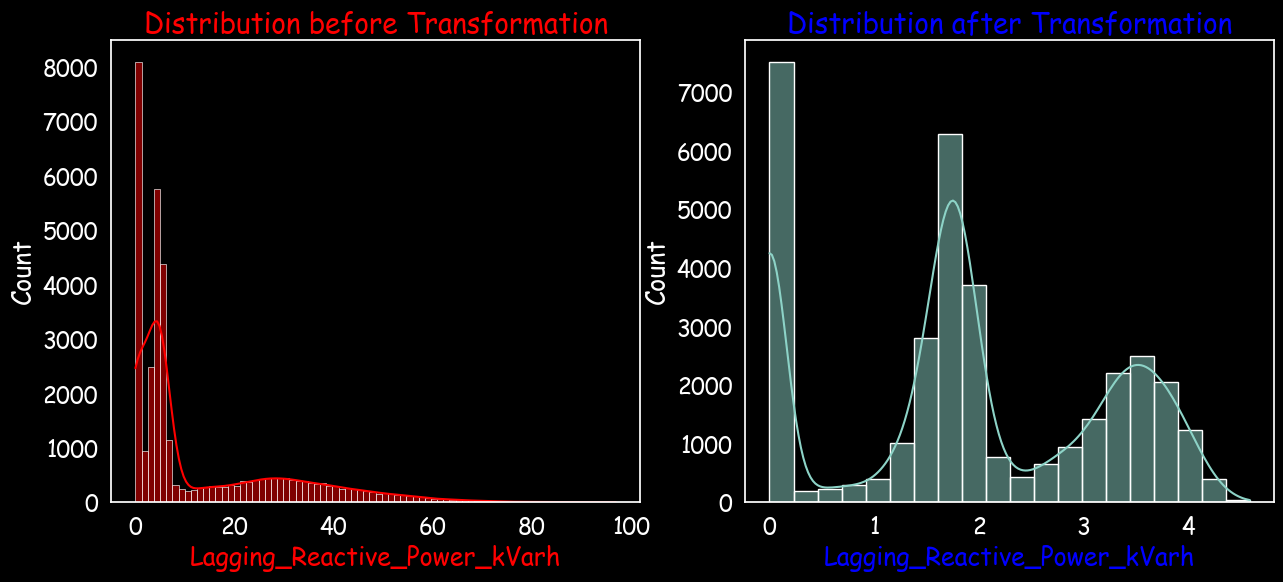

Skewness was 1.44 before & is -0.02 after Log transformation.


In [51]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

def logTrans(feature):   
    # Check if the feature is numeric
    if feature in numeric_cols:
        logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title("Distribution before Transformation", fontsize=20,color='red')
        sns.histplot(df[feature], kde=True, color="red")
        plt.xlabel(feature,color='Red')

        plt.subplot(1,2,2)
        df_log = pd.DataFrame(logTr.fit_transform(df))
        plt.title("Distribution after Transformation", fontsize=20,color='Blue')
        sns.histplot(df_log,bins=20, kde=True , legend=False)
        plt.xlabel(feature,color='Blue')
        plt.show()

        # Calculate skewness before and after transformation
        skew_before = df[feature].skew()
        skew_after = df_log[0].skew()
        print(f"Skewness was {round(skew_before, 2)} before & is {round(skew_after, 2)} after Log transformation.")
    else:
        print(f"Skipping feature {feature} as it is not numeric.")

logTrans(feature="Lagging_Reactive_Power_kVarh")


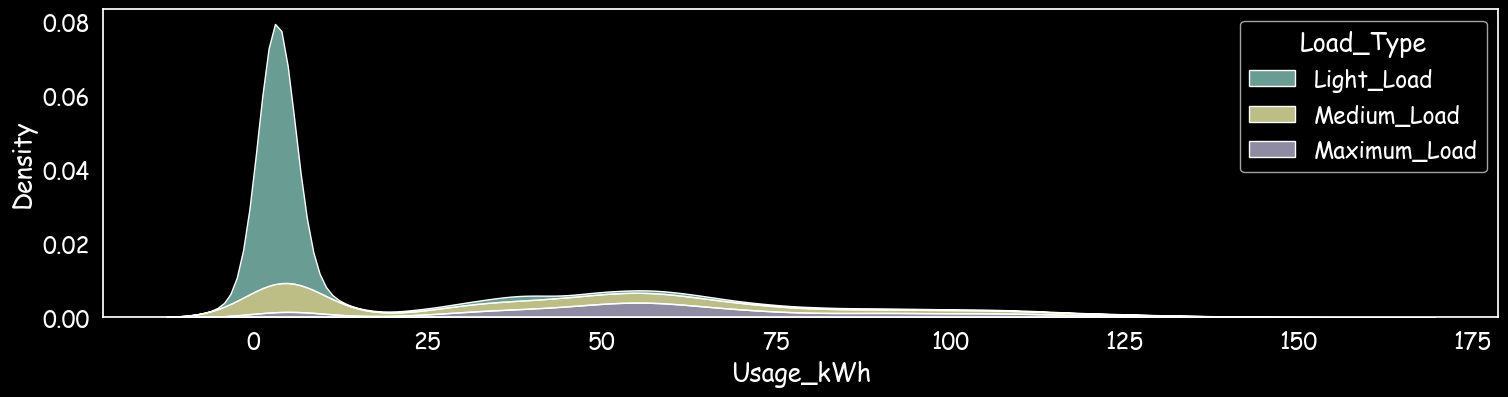

In [48]:
plt.figure(figsize=(18,4))
sns.kdeplot(data=df,x="Usage_kWh",hue='Load_Type',multiple="stack");

In [15]:
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

ValueError: could not convert string to float: '01/01/2018 00:15'

In [3]:
# lets prepare the entity here , and if i open the config.yaml file where i can find the root_dir,status_file,unzip_data the same i do find in the class iside the DataValiadationConfig
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict # here all_Schema just read all the data and install inside the all_schema varaible as a dictionary formate

In [4]:
# in order to prepare my cofiguration manager in src config i need this below 2 packages 
from PROJECTML.constants import *
from PROJECTML.utils.common import read_yaml, create_directories

In [5]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath) # here iam reading these all like config,params,schema 
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

# then i will prepare my get_data_validation_config , so inside this iam returning all of the varaibles that i have deifined inside my entity 
    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation  # after reading by config iam returning the root_dir,status_file etc one by one
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig( # the above entity code is return type , and the below varaibles are getting return after reading by config varaible 
            root_dir=config.root_dir, 
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [6]:
import os
from PROJECTML import logger

In [7]:
class DataValiadtion: # this is components name 
    def __init__(self, config: DataValidationConfig): # it will take my DataValidationConfig
        self.config = config

# now iam below iam going to create validate_all_columns,this is a simple python program
    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir) # here iam reading the dataset
            all_cols = list(data.columns) # here iam list down all the columns,it will check or matches the schema.yaml file columns whether all the columns present in schema.yaml file columns  present or not 

            all_schema = self.config.all_schema.keys()

            # if those schema.yaml file columns are present it will return status as true, else it will returnt he status as false, then it will return one txt file inside the artifacts folder which theat txt file contains status decision true or false
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e


   

In [8]:
try:
    config = ConfigurationManager() # here iam initializing my configuration manager
    data_validation_config = config.get_data_validation_config() # here iam getting my get_data_validation_config
    data_validation = DataValiadtion(config=data_validation_config) # then iam calling my DataValidation class and passing data_validation_config inside it
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2024-04-15 23:34:34,947: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-04-15 23:34:34,950: INFO: common: yaml file: params.yaml loaded successfully]
[2024-04-15 23:34:34,954: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-04-15 23:34:34,956: INFO: common: created directory at: artifacts]
[2024-04-15 23:34:34,958: INFO: common: created directory at: artifacts/data_validation]
